# Predicting if patients have diabetes

**Group No.25**

**By Bryan Zai Zheng Puah** (**S3783001**)

# Table of Contents

- [Introduction](#Introduction)

    - [Dataset Source](#Dataset-Source)
    - [Dataset Details](#Dataset-Details)
    - [Dataset Features](#Dataset-Features)
    - [Target Feature](#Target-Feature)
   
- [Goals & Objective](#Goals-&-Objective)
- [Data Cleaning & Preprocessing](#Data-Cleaning-&-Preprocessing)

    - [Data Info & Summary Statistics](#Data-Info-&-Summary-Statistics)
    - [Unusual Values and Missing Values](#Unusual-Values-and-Missing-Values)
    - [Handling Outliers](#Handling-Outliers)
    - [Discretize Variables](#Discretize-Variables)

- [Data Exploration & Visualisation](#Data-Exploration-&-Visualisation) 
    - [Univariate Visualisation](#Univariate-Visualisation)
    - [Bivariate Visualisation](#Bivariate-Visualisation)
    - [Multivariate Visualisation](#Multivariate-Visualisation)
- [Summary & Conclusion](#Summary-&-Conclusion)
- [References](#References)


# Introduction

### Dataset Source
The Diabetes dataset version is from the National Institute of Diabetes and Digestive and Kidney Diseases and is made available on Kaggle (https://www.kaggle.com/mathchi/diabetes-data-set). 

### Dataset Details

The Diabetes dataset contains 768 observations and consist of information regarding 9 features (8 descriptive features) and a target variable. The data represents information on female patients of Pima Indian heritage and who are of age 21 years old or older. The features in this dataset are primarily health related, with the aim to use these features to analyse the health and demographic of these patients and most importantly predict if a patient has diabetes.

### Dataset Features

#### Table of dataset descriptive features description
|Name|Data Type|Units|Description|
|-----------|-------------------------------|---------------------------------|----------------------------|
|Pregnancies |Numeric  |Unknown|A numerical value representing the number of times the patient was pregnant.|
|Glucose |Numeric|Unknown|Plasma glucose concentration level from an oral glucose tolerance test.|
|Blood Pressure |Numeric|mm Hg|Numeric measurements of the diastollic blood pressure of the patient.|
|SkinThickness |Numeric|mm|Numeric measurements of the patient's triceps skin fold thickness.|
|Insulin |Numeric|mu U/ml|Numeric measurements of the patient's insulin levels.|
|BMI |Numeric|kg/m^2|Numeric measurements of the patient's body mass index.|
|DiabetesPedigreeFunction|Numeric|Unknown|A numeric score of patient's likelihood of diabtes.|
|Age |Numeric|Years|A numerical value representing the patient's age.|

### Target Feature

The target feature in this dataset is the **'Outcome'** column. This column contains values in the form of a binary variable ('1' and '0'), where '1' indicates the patient has diabetes and '0' indicating that the patient does not have diabetes.

# Goals & Objective

The goal of this project is to ultimately predict if female patients of Pima Indian heritage and who are 21 years old or older have diabetes. To help achieve this goal there are several objectives in place that we aim to undertake in this phase of the project which are neccessary in order achieve the project goal. Firstly, before exploring and gaining informative insights from the diabetes dataset, data cleaning and preprocessing will be performed. These activities include checking for missing values, outliers and unusual values. Through data preprocessing  we aim to ensure the data is free from bias and that the data is accurate before proceeding on with the data exploration and data modelling steps. Given diabetes is a health related issue, exploring the underlying factors such as the demographic and medical measurements in relation to being diagnose with diabetes is necessary in gaining a deeper insight of the status of patients. Hence, this project also aims to model and visualise these factors to allow us to identify any signficant trends that may be reoccuring and possibly a significant factor contributing to a patient being diagnose with diabetes. Ultimately, through a graphical visualisation we aim to achieve clarity of the features in the dataset and the underlying trends which will also assist in understanding the features more precisely before developing the predictive machine learning models. Finally, to build a better picture of the likelihood of patients having diabetes we will aim to utilize several machine learning models including KNN, Decision Tree and Random Forest during the predictive modeling stage in the next phase of the project to assist in predicting the likelihood of diabetes. 

# Data Cleaning & Preprocessing

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None) 

In [4]:
#Load dataset from a csv file
diabetes = pd.read_csv("diabetes.csv")

In [5]:
#Observe first 5 rows of dataset
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#Get shape of data
diabetes.shape

(768, 9)

### Data Info & Summary Statistics

In [7]:
#Check description of data 
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#Show summary of numerical features 
diabetes.describe().round(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


We observe no unusual values in all the numeric columns. 

### Unusual Values and Missing Values

In [9]:
#Check for appropiate datatypes.
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

All features are observed to be in the correct data type.

In [10]:
#Check for missing values
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no missing values. 

In [11]:
#Check for inappropiate age values
check_age = 0 <= diabetes['Age'].all() <= 120
check_age

True

There are no inappropiate age values. 

### Handling Outliers

To identify and observe outliers, we plot boxplot of all the numerical features to examine if outliers exists.

Text(0.5, 1.0, 'Boxplot of Pregnancies')

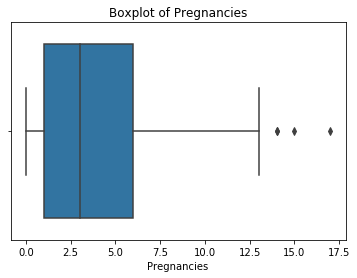

In [12]:
sns.boxplot(y=diabetes['Pregnancies'], orient = 'h')
plt.title('Boxplot of Pregnancies')

Text(0.5, 1.0, 'Boxplot of Glucose')

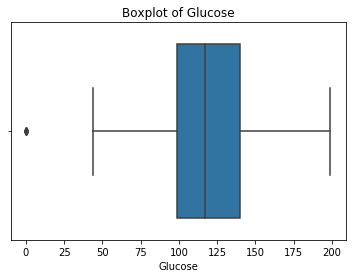

In [13]:
sns.boxplot(y=diabetes['Glucose'], orient = 'h')
plt.title('Boxplot of Glucose')

Text(0.5, 1.0, 'Boxplot of BloodPressure')

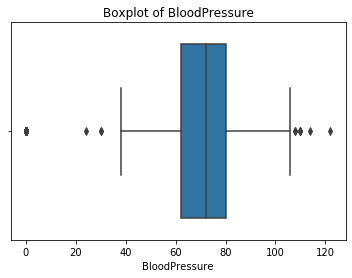

In [14]:
sns.boxplot(y=diabetes['BloodPressure'], orient = 'h')
plt.title('Boxplot of BloodPressure')

Text(0.5, 1.0, 'Boxplot of SkinThickness')

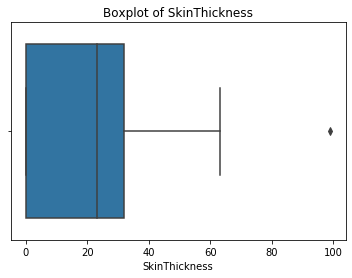

In [15]:
sns.boxplot(y=diabetes['SkinThickness'], orient = 'h')
plt.title('Boxplot of SkinThickness')

Text(0.5, 1.0, 'Boxplot of Insulin')

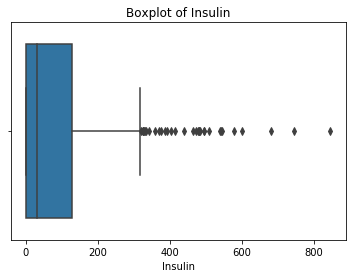

In [16]:
sns.boxplot(y=diabetes['Insulin'], orient = 'h')
plt.title('Boxplot of Insulin')

Text(0.5, 1.0, 'Boxplot of BMI')

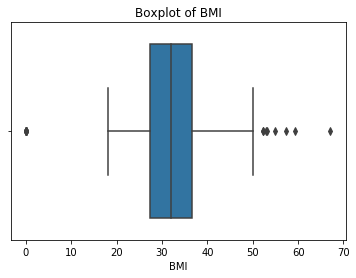

In [17]:
sns.boxplot(y=diabetes['BMI'], orient = 'h')
plt.title('Boxplot of BMI')

Text(0.5, 1.0, 'Boxplot of DiabetesPedigreeFunction')

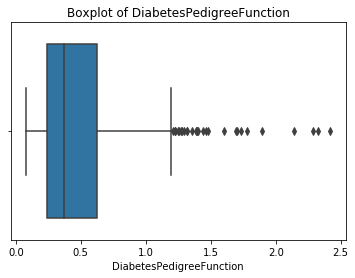

In [18]:
sns.boxplot(y=diabetes['DiabetesPedigreeFunction'], orient = 'h')
plt.title('Boxplot of DiabetesPedigreeFunction')

Text(0.5, 1.0, 'Boxplot of Age')

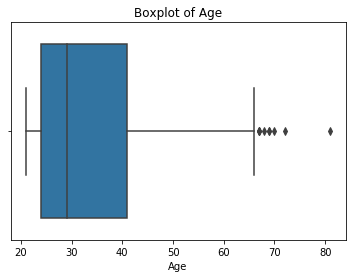

In [19]:
sns.boxplot(y=diabetes['Age'], orient = 'h')
plt.title('Boxplot of Age')

Based on all of these boxplots, we can identify that outliers exists in all the numerical variables. Although these variables contain outliers, we will not remove them as these outliers tells us valuable information and are valid values. Given the analysis aims to look at patients with and without diabetes, keeping these outliers can allow for strong or weak correlations to be identified based on different relationships. For instance an outlier in the variable blood pressure indicating a patient with extremely high blood pressure could provide some correlation or links as to whether this patient may have a higher chance of developing diabetes. Similarly outliers in the age variable could also allow us to examine if there is a correlation between older people being diagnose with diabetes. Ultimately, the outliers in relation to the context of this dataset is necessary to keep as it will provide a more accurate analysis and insight of different patients by allowing us to draw out important correlations that should be noted of.

### Discretize Variables

### Discretize Age variable

In [20]:
#Discretize Age variable into 7 categories between min Age and max Age.
diabetes['Age'] = pd.cut(diabetes['Age'], bins=[19,29,39,49,59,69,79,89],
                         labels=['20-29','30-39','40-49','50-59','60-69','70-79','80-89'])

In [21]:
#Check to confirm groups
diabetes['Age'].value_counts()

20-29    396
30-39    165
40-49    118
50-59     57
60-69     29
70-79      2
80-89      1
Name: Age, dtype: int64

### Discretize Pregnancies variable

In [22]:
#Discretize Pregancies variable into 7 groups
diabetes['Pregnancies'] = pd.cut(diabetes['Pregnancies'], bins=[-1,2,5,8,11,14,17,20],
                         labels=['0-2','3-5','6-8','9-11','12-14','15-17','18-20'])

In [23]:
#Check to confirm groups
diabetes['Pregnancies'].value_counts()

0-2      349
3-5      200
6-8      133
9-11      63
12-14     21
15-17      2
18-20      0
Name: Pregnancies, dtype: int64

# Data Exploration & Visualisation

### Univariate Visualisation

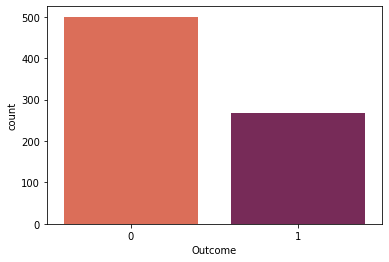

In [24]:
sns.countplot(diabetes['Outcome'], palette="rocket_r")

Text(0, 0.5, 'Count')

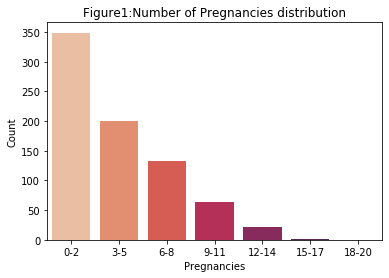

In [24]:
#Plot number of patients in each number of pregnancies group
sns.countplot(diabetes['Pregnancies'], palette="rocket_r")
plt.title('Figure1:Number of Pregnancies distribution')
plt.ylabel('Count')

Text(0.5, 0, 'Age Group')

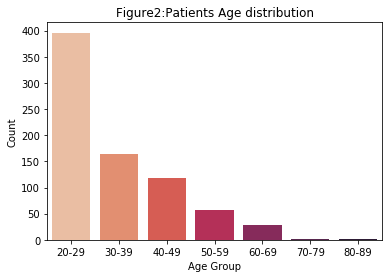

In [25]:
#Plot number of patients in each age group
sns.countplot(diabetes['Age'], palette="rocket_r")
plt.title('Figure2:Patients Age distribution')
plt.ylabel('Count')
plt.xlabel('Age Group')

Text(0, 0.5, 'Count')

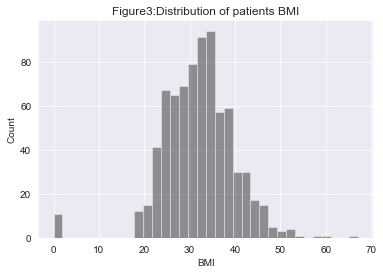

In [26]:
#Distribution of patients BMI
sns.set_style('darkgrid')
sns.distplot(diabetes['BMI'],color='black',kde=False)
plt.title('Figure3:Distribution of patients BMI')
plt.ylabel('Count')

The univariate distribution illustrates signficant trends about this group of patients. Figure 1 shows that patients being pregnant 0-2 times was signficantly higher than those being pregnant more than this group. Furthermore, figure 2 displays that the most frequent age group is the 20-29 age group, with almost half of the patients being in this age group. Finally figure 3 displays a relatively normal distribution of the BMI measurements, where majority of the BMI measured is between 20 and 50 kg/m^2.

### Bivariate Visualisation

Text(0.5, 1.0, 'Figure4:Plot of Age Group against BMI')

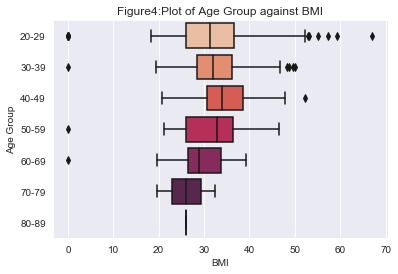

In [27]:
sns.boxplot(x='BMI',y='Age',data=diabetes, palette='rocket_r')
plt.ylabel('Age Group')
plt.title('Figure4:Plot of Age Group against BMI')

Text(0.5, 1.0, 'Figure5:Plot of Number of Pregnancies against Insulin')

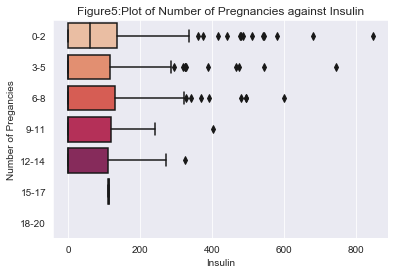

In [28]:
sns.boxplot(x='Insulin',y='Pregnancies',data=diabetes, palette='rocket_r')
plt.ylabel("Number of Pregancies")
plt.title("Figure5:Plot of Number of Pregnancies against Insulin")

Text(0, 0.5, 'Count')

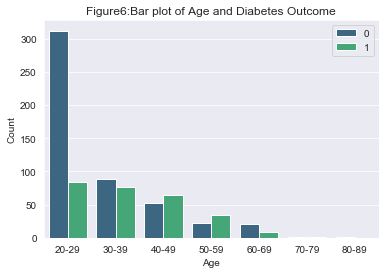

In [29]:
sns.countplot(x='Age',data=diabetes,hue='Outcome',palette='viridis')
plt.legend(loc='upper right')
plt.title("Figure6:Bar plot of Age and Diabetes Outcome")
plt.ylabel("Count")

As shown by the bivariate visualisation, based on figure4 we can observe that median BMI increases gradually from the age groups 20-29 to 40-49, however gradually decreases from 50-59 to 70-79 age groups. In terms of the distribution of insulin levels based on the number of pregnancies displayed in figure5, the distribution remains relatively similar amongst all groups, however patients with less pregancies appear to have more outliers situated at high insulin levels. Thirdly, according to the barplot of age group and their diabetes outcome, there appears to be less people with diabetes in this particular group of patients, however it should be noted that the number of people with diabetes in the age group 40-49 and 50-59 are higher than people without diabetes in comparison to the other age groups where there are more people without diabetes. 

### Multivariate Visualisation

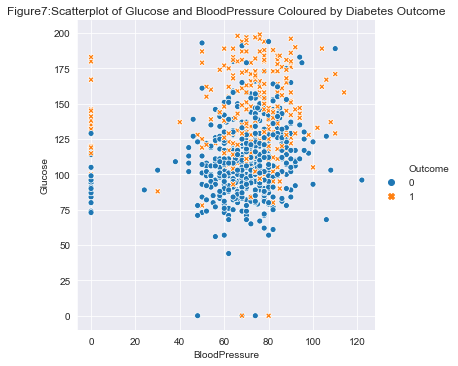

In [30]:
sns.relplot(x='BloodPressure',y='Glucose',
            data=diabetes,hue ='Outcome',style='Outcome',palette='tab10')
plt.title("Figure7:Scatterplot of Glucose and BloodPressure Coloured by Diabetes Outcome")
plt.show()

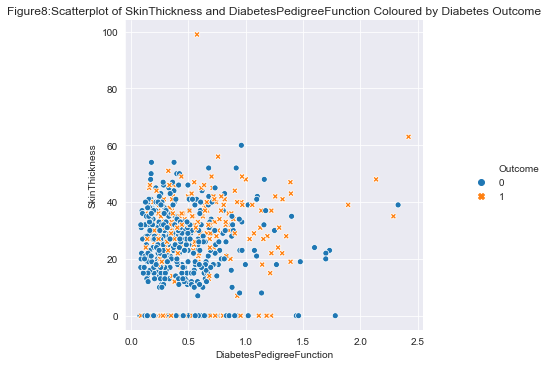

In [31]:
sns.relplot(x='DiabetesPedigreeFunction',y='SkinThickness',
            data=diabetes,hue ='Outcome',style='Outcome',palette='tab10')
plt.title("Figure8:Scatterplot of SkinThickness and DiabetesPedigreeFunction Coloured by Diabetes Outcome")
plt.show()

The two multivariate visualisation shows informative trends about two multivariate correlations, where a scatterplot is used to examine for any correlations. In figure 7, it is notable by the position of the orange cross representing patients diagnose with diabetes that they generally have higher glucose levels, where majority of points above glucose levels of 150 are patients with diabetes. In contrast, there is not a significant increasing or decreasing trend however blood pressure of patients with and without diabetes is shown to situate largely between 60 and 100 mm Hg. Overall, the most signficant correlation in this plot is the impact higher glucose levels have on increasing the likelihood a patient has diabetes incomparison to lower levels.
On the other hand, figure 8 shows a slight positive correlation between skin thickness levels and diabetes pedigree function, with the points representing diabetes and non diabetes patient. Overall, figure8 shows that as diabetes pedigree function and skin thickness increases, the number of patients with diabetes also increases shown by the orange points, particularly as patients without diabetes are situated at lower levels in both features. 

# Summary & Conclusion

Through performing data preprocessing on the diabetes dataset, this overall ensured that the results obtained from further analysis of the data were accurate and free from bias. After importing the diabetes dataset, we first performed an information summary check, by determining information on the number of instances in each column, if columns were non-null as well as the dtypes of instances in each column. Next, we examined the summary statistics of each variable and could observe that no values in each column appeared to be unsual and generally contained appropiate values in their respective columns. Missing values were also checked, in which no missing values existed. Elsewhere, unusual values were also checked, in particular the age column where a check was made to see if age values were between values 0 and 120, in which they were. This is particularly necessary as a negative age or an age value that is extremely high would be unusual. After that, a series of univariate boxplot for each of the numerical features were plotted to observe the distribution of each numerical variable and determine if any outliers existed. As observed, outliers existed in the distribution of all the variables, however in the context of this particular dataset and the information that we aim to extract from it, we decided not to remove the outliers as the values would assist in drawing any significant correlation that may exist between the variables. Hence, if we had removed the outliers, important correlation information regarding the different variables may have been reduced or less signifcantly pointed out during the exploratory or modelling phase. Lastly, in the data preprocessing stage, we also discretize the pregancies and age variable to reduce the number of different values in these columns. Instead, we group the values into groups, thus making it simpler to explore the data in the exploratory stage as well as to potentially reduce any noise when building the predictive models. 

Finally, in the data exploratory stage, univariate, bivariate and multivariate plots were plotted to gain a deeper understanding of the variables in the dataset and draw out any significant correlations or trends that may exists between the variables. Notable information obtained from this exploratory analysis include majority of the patients in this dataset were in the age group 20-29, median BMI levels appear to gradually increase from the age group 20-29 to 40-49 and gradually decrease from 50-59 to 80-89. Additionally, it was found that the number of people with diabetes in the age group 40-49 and 50-59 are higher than people without diabetes in comparison to the other age groups where there are more people without diabetes. Lastly, through mulitvariate visualisation of three variables, a notable observation was that patients diagnose with diabetes generally have higher glucose levels however thier blood pressure remained relatively similar with non diabetes patients. Moreover, when compared against the blood pressure variable, there was not a significant increasing or decreasing trend. Overall, this highlights the importance of visualising these distribution of drawing out such trends. Ultimately, through performing the data preprocessing we were able to ensure that the results from the analysis is accurate and free from bias. Moreover through exploratory analysis, we have gained a deeper insights of the type of patients. Overall, by performing these activities, we have achieved our objectives of thoroughly preparing and understanding the data through better undertertstanding trends and correlations before building the predictive models to ultimately predict if a patient will have diabetes. 

# References

Kaggle.(2020).*Diabetes Data Set*.[Dataset],Retrieved from https://www.kaggle.com/mathchi/diabetes-data-set

Aksakalli V.*Seaborn*.Retrieved August 10,2021,from https://www.featureranking.com/tutorials/python-tutorials/seaborn/

Aksakalli V.*Data Preparation for Predictive Modeling*.Retreived August 10,2021,from https://www.featureranking.com/tutorials/machine-learning-tutorials/data-preparation-for-predictive-modeling/